In [17]:
from sklearn.svm import SVC
from sentence_transformers import SentenceTransformer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
%run -i "../util/util_simple_classifier.ipynb"

In [3]:
# Same as 4.4
train_df = pd.read_json("../data/bbc_train.json")
test_df = pd.read_json("../data/bbc_test.json")
train_df.sample(frac=1)

,text,label,label_text,text_tokenized,text_clean
1825,brookside actress keaveney dies actress anna k...,3,entertainment,"[brookside, actress, keaveney, dies, actress, ...",brookside actress keaveney dies actress anna k...
1703,wal-mart is sued over rude lyrics the parents ...,3,entertainment,"[wal-mart, sued, rude, lyrics, parents, 13-yea...",wal-mart sued rude lyrics parents 13-year-old ...
269,roddick to face saulnier in final andy roddick...,2,sport,"[roddick, face, saulnier, final, andy, roddick...",roddick face saulnier final andy roddick play ...
17,playstation 3 processor unveiled the cell proc...,0,tech,"[playstation, 3, processor, unveiled, cell, pr...",playstation 3 processor unveiled cell processo...
1435,downloads enter us singles chart digital music...,3,entertainment,"[downloads, enter, us, singles, chart, digital...",downloads enter us singles chart digital music...
...,...,...,...,...,...
86,text message record smashed uk mobile owners c...,0,tech,"[text, message, record, smashed, uk, mobile, o...",text message record smashed uk mobile owners c...
1773,more women turn to net security older people a...,0,tech,"[women, turn, net, security, older, people, wo...",women turn net security older people women inc...
1190,media gadgets get moving pocket-sized devices ...,0,tech,"[media, gadgets, get, moving, pocket-sized, de...",media gadgets get moving pocket-sized devices ...
1659,gervais writing simpsons episode the office s ...,3,entertainment,"[gervais, writing, simpsons, episode, office, ...",gervais writing simpsons episode office ricky ...


In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')
def get_sentence_vector(text, model):
    sentence_embeddings = model.encode([text])
    return sentence_embeddings[0]

In [5]:
def train_classifier(X_train, y_train):
    clf = SVC(C=0.1, kernel='rbf')
    clf = clf.fit(X_train, y_train)
    return clf

In [6]:
target_names=["tech", "business", "sport", "entertainment", "politics"]
vectorize = lambda x: get_sentence_vector(x, model)
(X_train, X_test, y_train, y_test) = create_train_test_data(train_df, test_df, vectorize, column_name="text_clean")
clf = train_classifier(X_train, y_train)
print(classification_report(train_df["label"], y_train, target_names=target_names))
test_classifier(test_df, clf, target_names=target_names)

               precision    recall  f1-score   support

         tech       1.00      1.00      1.00       321
     business       1.00      1.00      1.00       408
        sport       1.00      1.00      1.00       409
entertainment       1.00      1.00      1.00       309
     politics       1.00      1.00      1.00       333

     accuracy                           1.00      1780
    macro avg       1.00      1.00      1.00      1780
 weighted avg       1.00      1.00      1.00      1780

               precision    recall  f1-score   support

         tech       0.97      0.95      0.96        80
     business       0.98      0.97      0.98       102
        sport       0.98      1.00      0.99       102
entertainment       0.96      0.99      0.97        77
     politics       0.98      0.96      0.97        84

     accuracy                           0.98       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.98      0.98      0.98       445



In [20]:
num_to_text_mapping = {0:"tech", 1:"business", 2:"sport", 3:"entertainment", 4:"politics"}
test_df["pred_label"] = test_df["prediction"].apply(lambda x: num_to_text_mapping[x])

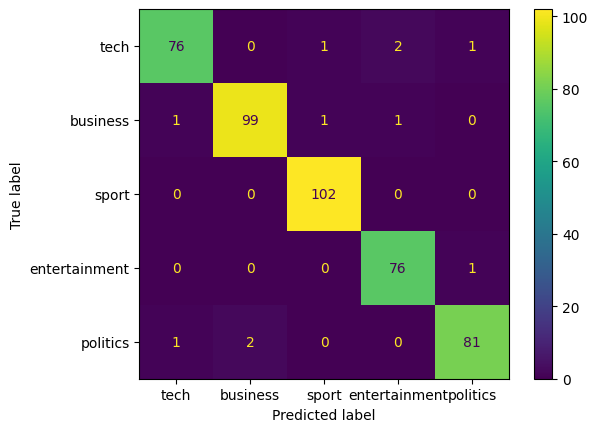

In [19]:
cm = confusion_matrix(test_df["label_text"], test_df["pred_label"], labels=target_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()